# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

##### Análise dos atributos

* **Id**: Identificação do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes
    * tratamento por média
    * REMOVIDA:

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)
    * tratamento por média
    * REMOVIDA:

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0
    * tratamento por média

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos
    * tratamento por média

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento
    * REMOVIDA:

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe
    * conversão simbólico-numérico com **label encoding (ordinal) ou hot-one encoding (nominal)**

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes
    * tratamento por média

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 
    * tratamento por média

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * tratamento por moda
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * tratamento por moda
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
    * tratamento por média

* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis

In [23]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt


from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [24]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!



#### Exploração dos dados com estatística descritiva

Resumo quantitativo das principais características de um conjunto de dados:
* Frequência
* Localização ou tendência central
* Dispersão ou espalhamento
* Distribuição ou formato

Os três últimos são utilizados geralmente para valores numéricos.

Para dados univariados: 
* Medidas de localidade: moda, média, mediana, média truncada, quartis, percentil (boxplot)
* Medidas de espalhamento: intervalo, variância e descio padrão
* Medidas de distribuição: obliquidade ou assimetria e curtose (histograma e gráfico pizza)

Para dados multivariados:
* Medidas de localidade: calculado para cada atributo separadamente
* Medidas de espalhamento: calculado apra cada atributo separadamente + covariância e correlação (matriz de covariância ou correlação)

In [25]:
print("Registros de treino fornecidos: ", df_train_id.shape)

# recuperar as partições de treino por Id e concatenar o coluna alvo CLASSE
df_train = pd.merge(df_dataset, df_train_id, on='Id')


# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0)
print("Registros de treino classificados: ", df_train.shape)


Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)


In [26]:
# ANÁLISE DE VALORES FALTANTES

analise_valores_faltantes(df_train)

Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,252.0,1.858544
Altura,0.0,0.000000
IMC,3178.0,23.438307
Atendimento,225.0,1.659414
DN,604.0,4.454606
IDADE,604.0,4.454606
Convenio,3711.0,27.369275
PULSOS,46.0,0.339258
PA SISTOLICA,5339.0,39.376060


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [27]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

# df_train = df_train.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)


In [28]:
# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS

# col_numerica = ['Id', 'IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']    
col_numerica = ['IMC', 'Peso', 'Altura', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']   
col_categorica = ['PULSOS', 'PPA', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1', 'MOTIVO2']
col_temporais = ['Atendimento', 'DN']

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = invalidar_nao_numerico(df_train, col_numerica)
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if 0<x else np.nan)

# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = padronizar_string(df_train, col_categorica)
       
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_train['PPA'] = df_train['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
       
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)
       
        # CLASSE
valores_validos_0 = ['Normal', 'Normais']
valores_validos_1 = ['Anormal']
df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 0 if x in valores_validos_0 else 1 if x in valores_validos_1 else np.nan)


# ATRIBUTOS TEMPORAIS
df_train[col_temporais] = invalidar_nao_temporais(df_train, col_temporais)

In [29]:
# GERAR ESTATÍSTICA DO CONJUNTO ANTES DA REMOÇÃO DE OUTLIERS
df_detalhes = df_train.describe(include='all')
display(df_detalhes)


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13559.000000,13307.000000,13559.000000,10381.000000,12995,12686,12588.000000,9848,13513,8220.000000,...,5664,13529,13538,12798.000000,10075,534,12972,13262,10306,13559.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,5,NaN,...,7,5,5,NaN,8,8,2,5,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GS,normais,NaN,...,normal,normal,ausente,NaN,assintomático,Palpitacao,m,5 - parecer cardiológico,5 - cirurgia,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2126,13375,NaN,...,4917,12930,8708,NaN,7486,126,7572,6322,3336,NaN
mean,8956.136219,22.098362,87.304373,17.791735,2007-03-05 00:51:44.948057088,2001-02-11 15:48:50.285353856,6.475177,NaN,NaN,101.392336,...,NaN,NaN,NaN,94.086732,NaN,NaN,NaN,NaN,NaN,0.399808
min,2.000000,-40.000000,0.000000,0.000000,1990-01-03 00:00:00,1969-07-14 00:00:00,0.010000,NaN,NaN,10.000000,...,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4467.500000,8.500000,50.000000,15.000000,2005-05-23 00:00:00,1997-06-09 06:00:00,2.380000,NaN,NaN,90.000000,...,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8936.000000,18.500000,101.000000,17.000000,2007-06-20 00:00:00,2001-06-12 00:00:00,5.820000,NaN,NaN,100.000000,...,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13435.500000,32.000000,132.000000,19.000000,2009-01-16 00:00:00,2005-02-10 18:00:00,10.090000,NaN,NaN,110.000000,...,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,1.000000
max,17873.000000,127.000000,198.000000,848.000000,2066-08-22 00:00:00,2068-07-06 00:00:00,70.610000,NaN,NaN,990.000000,...,NaN,NaN,NaN,9288.000000,NaN,NaN,NaN,NaN,NaN,1.000000


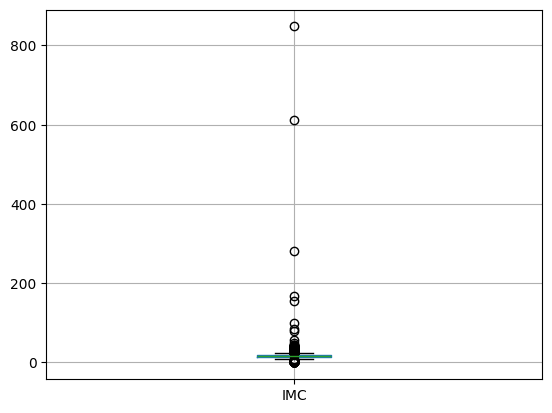

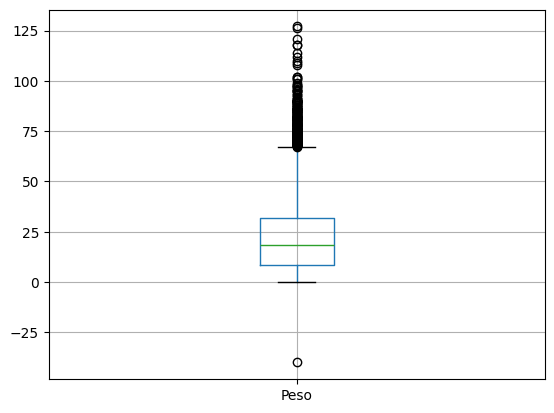

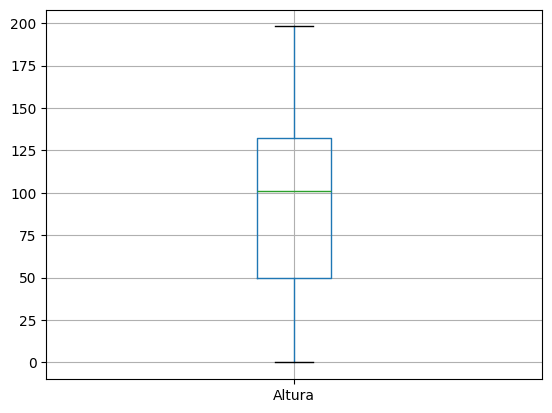

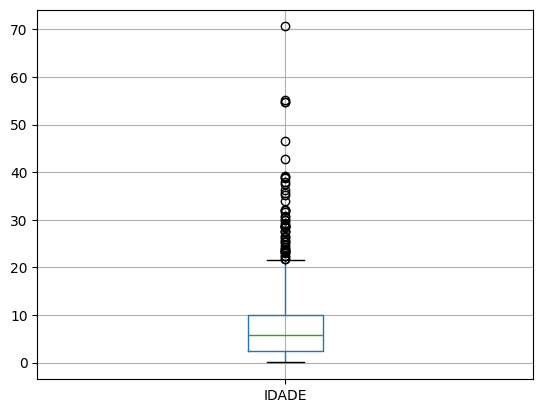

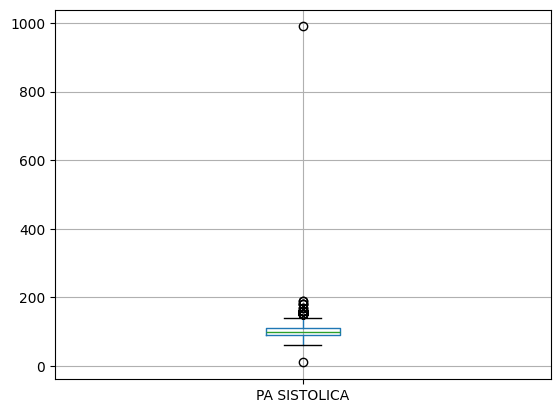

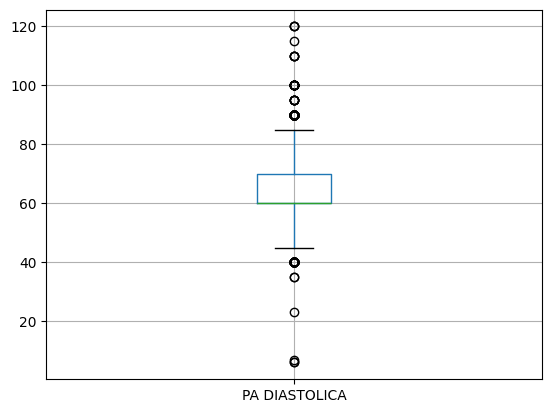

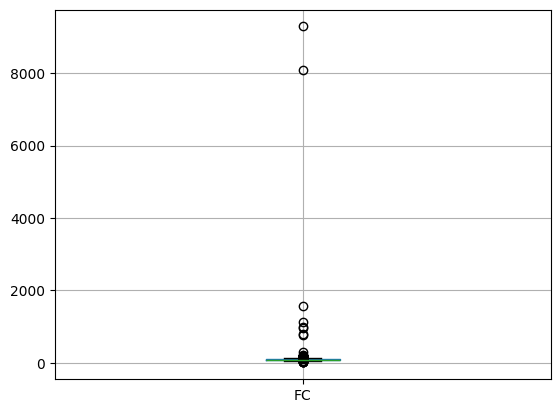

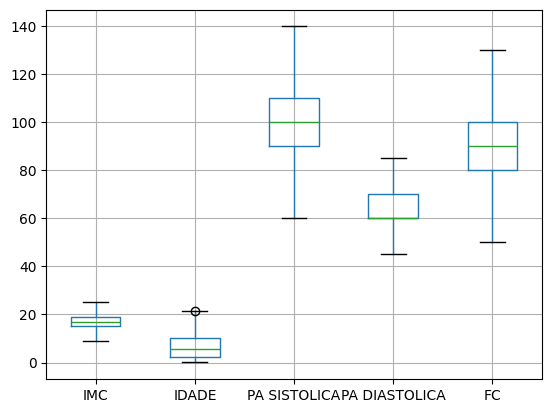

In [30]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS
# identificação de outliers por atributo 

# por boxplot
for coluna in col_numerica:
    plt.figure()
    df_train.boxplot(column=coluna)
plt.show()

df_train = invalidar_outliers_quartil(df_train, ['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])

df_train.boxplot(column=['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])
plt.show()


In [31]:
# EXCLUIR REGISTROS COM MENOS DE 50% DOS VALORES PREENCHIDOS 

analise_registro_incompleto(df_train, 0.5)
df_train = remover_registros_incompletos(df_train, 0.5)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

162 de 13559 (1.1947783759864297%) registros com mais de 50.0% dos atributos faltantes
Conjunto de treino sem registros com baixa taxa de preenchimento:  (13397, 21)


In [32]:
# ANALISANDO CORRELAÇÃO

display(df_train[['IMC', 'Peso', 'Altura', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC', 'IDADE','Atendimento', 'DN']].corr())


,IMC,Peso,Altura,PA SISTOLICA,PA DIASTOLICA,FC,IDADE,Atendimento,DN
IMC,1.000000,0.617432,0.399651,0.404366,0.314749,-0.241984,0.353093,-0.001824,-0.016273
Peso,0.617432,1.000000,0.682135,0.413968,0.322154,-0.452852,0.741110,0.008457,-0.027062
Altura,0.399651,0.682135,1.000000,0.161703,0.139393,-0.336735,0.488451,0.023510,0.012239
PA SISTOLICA,0.404366,0.413968,0.161703,1.000000,0.669991,-0.168908,0.402573,0.005323,-0.015841
PA DIASTOLICA,0.314749,0.322154,0.139393,0.669991,1.000000,-0.121405,0.309080,0.001491,-0.012611
FC,-0.241984,-0.452852,-0.336735,-0.168908,-0.121405,1.000000,-0.595394,0.002726,-0.007663
IDADE,0.353093,0.741110,0.488451,0.402573,0.309080,-0.595394,1.000000,-0.005209,-0.138524
Atendimento,-0.001824,0.008457,0.023510,0.005323,0.001491,0.002726,-0.005209,1.000000,0.553847
DN,-0.016273,-0.027062,0.012239,-0.015841,-0.012611,-0.007663,-0.138524,0.553847,1.000000


In [ ]:
# PEENCHIMENTO DOS VALORES FALTANTES NUMÉRICOS (inválidos, outliers)

df_imputed_knn_1 = pd.DataFrame(imputador_faltantes_knn(df_train, col_numerica, 1).transform(df_train[col_numerica]), columns=col_numerica)
df_imputed_knn_3 = pd.DataFrame(imputador_faltantes_knn(df_train, col_numerica, 3).transform(df_train[col_numerica]), columns=col_numerica)
df_imputed_knn_5 = pd.DataFrame(imputador_faltantes_knn(df_train, col_numerica, 5).transform(df_train[col_numerica]) , columns=col_numerica)
df_imputed_media = pd.DataFrame(imputador_faltantes_media(df_train, col_numerica).transform(df_train[col_numerica]), columns=col_numerica)

display(df_train)


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,2,3.5,50,14.0,2005-05-25,2005-05-19,0.02,GS,normais,NaN,...,NaN,normal,ausente,128.0,dispneia,NaN,m,6 - suspeita de cardiopatia,6 - dispnéia,1
1,3,0.0,0,NaN,2001-06-12,2005-05-08,NaN,SULA,normais,NaN,...,NaN,normal,sistólico,88.0,assintomático,NaN,m,2 - check-up,NaN,1
2,4,8.1,65,19.0,2009-10-15,2009-04-21,0.50,NaN,normais,NaN,...,NaN,normal,ausente,92.0,assintomático,NaN,m,5 - parecer cardiológico,NaN,1
3,6,26.0,112,21.0,2003-08-22,1999-05-26,4.40,GS,normais,100.0,...,normal,desdob fixo,ausente,100.0,assintomático,NaN,m,2 - check-up,NaN,1
4,7,40.0,151,18.0,2008-01-14,1995-08-14,12.89,SAME,normais,NaN,...,NaN,normal,ausente,96.0,dor precordial,NaN,m,5 - parecer cardiológico,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,17868,10.6,85,15.0,2006-12-28,2004-12-06,2.14,NaN,normais,90.0,...,NaN,normal,ausente,100.0,assintomático,NaN,m,5 - parecer cardiológico,5 - cirurgia,0
14723,17869,9.5,76,16.0,2006-02-03,2004-12-06,1.20,NaN,normais,NaN,...,NaN,normal,ausente,92.0,assintomático,NaN,m,5 - parecer cardiológico,5 - cirurgia,0
14724,17871,65.0,175,21.0,2007-08-03,1984-02-16,NaN,Medial,normais,126.0,...,NaN,normal,ausente,76.0,dor precordial,NaN,f,1 - cardiopatia já estabelecida,1 - cardiopatia congenica,0
14725,17872,27.0,134,15.0,2004-10-04,2027-12-03,NaN,GS,normais,90.0,...,NaN,normal,sistólico,NaN,NaN,NaN,f,6 - suspeita de cardiopatia,6 - dor precordial,0


In [34]:
# TRANSFORMÇÃO SIMBÓLICO-NUMÉRICO

col_nominal = ["PULSOS", "B2", "HDA 1", "SEXO", "MOTIVO1", "MOTIVO2"]
col_ordinal = ["PPA", "SOPRO"]

codificador_hotOne = codificador_converter_nominais(df_train, col_nominal)
df_encoded = pd.DataFrame(codificador_hotOne.transform(df_train[col_nominal]), columns=codificador_hotOne.get_feature_names_out(col_nominal))

display(df_encoded)


,PULSOS_amplos,PULSOS_diminuídos,PULSOS_femorais diminuidos,PULSOS_normais,PULSOS_outro,PULSOS_nan,B2_desdob fixo,B2_hiperfonética,B2_normal,B2_outro,...,MOTIVO2_6 - cardiopatia na familia,MOTIVO2_6 - cianose,MOTIVO2_6 - cianose e dispnéia,MOTIVO2_6 - dispnéia,MOTIVO2_6 - dor precordial,MOTIVO2_6 - has/dislipidemia/obesidade,MOTIVO2_6 - palpitação/taquicardia/arritmia,MOTIVO2_6 - sopro,MOTIVO2_outro,MOTIVO2_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13392,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13393,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13394,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# PEENCHIMENTO DOS VALORES FALTANTES CATEGÓRICOS (inválidos, outliers)

df_imputed_moda = pd.DataFrame(imputador_faltantes_moda(df_train, col_categorica).transform(df_train[col_categorica]), columns=col_categorica)

# df_imputed_randomForest = df_encoded
# imputador_faltantes_randomForest(df_imputed_randomForest, df_encoded.columns)

Relação de atributos e porcentagem de nulos: 


,qtd,%
IMC,3555.0,26.535792
Peso,252.0,1.881018
Altura,0.0,0.000000
IDADE,862.0,6.434276
PA SISTOLICA,5220.0,38.963947
PA DIASTOLICA,5433.0,40.553855
FC,1145.0,8.546690


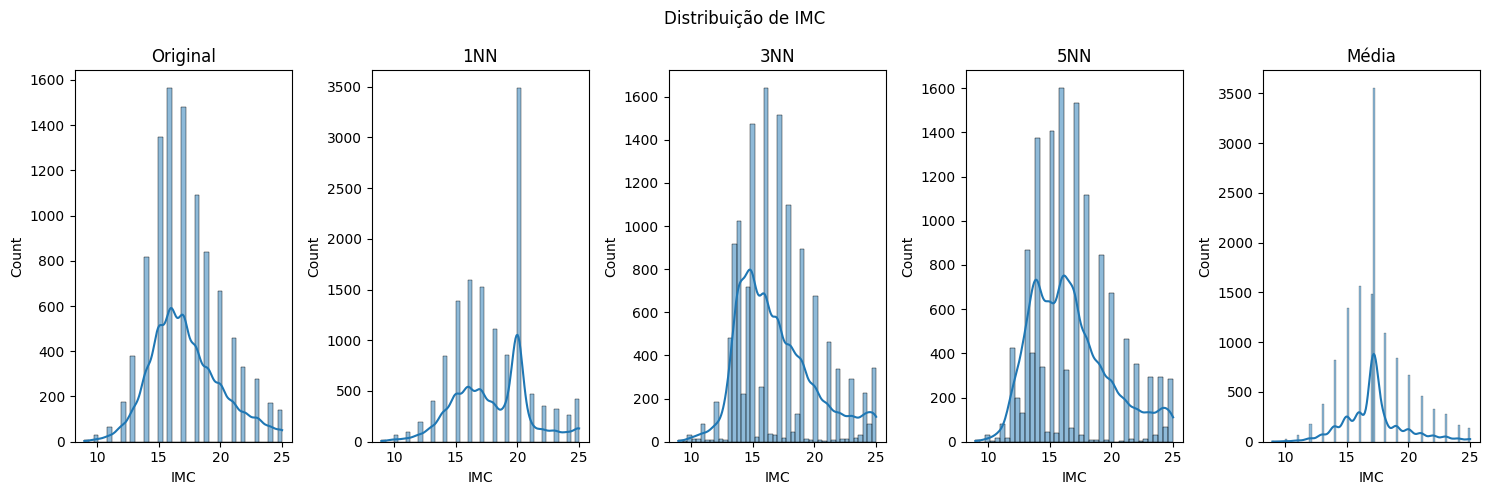

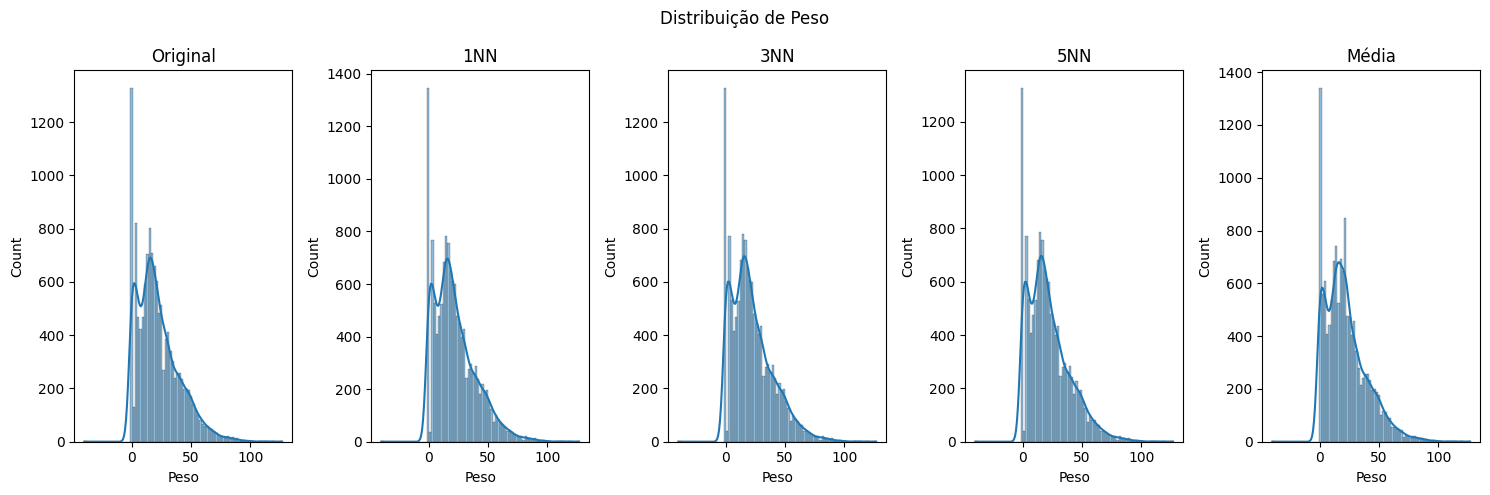

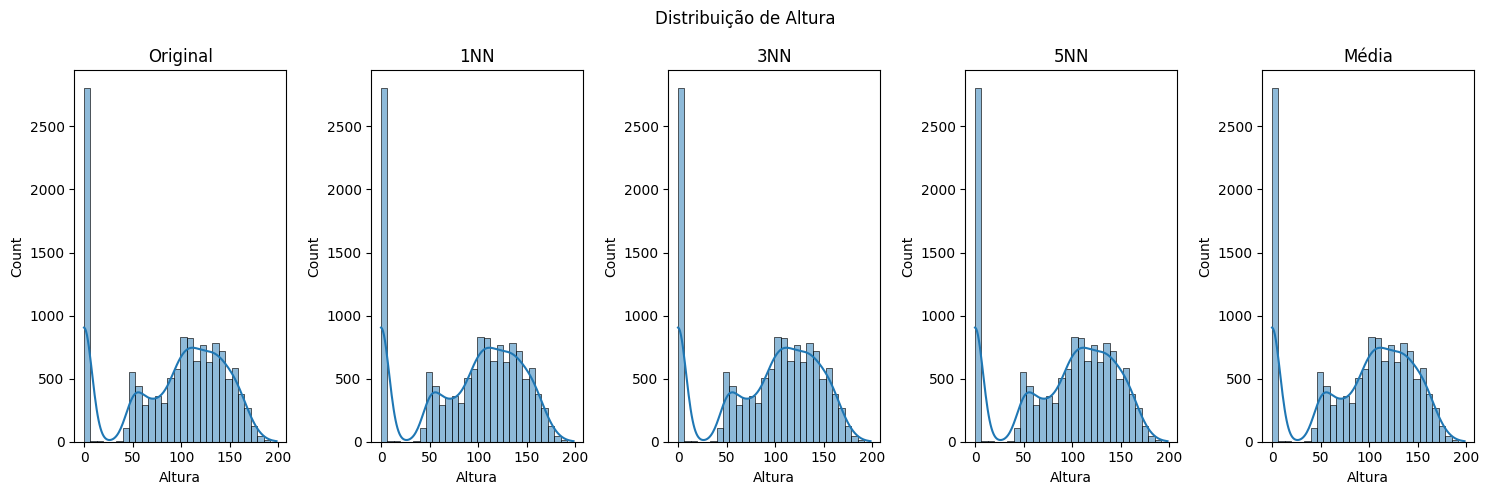

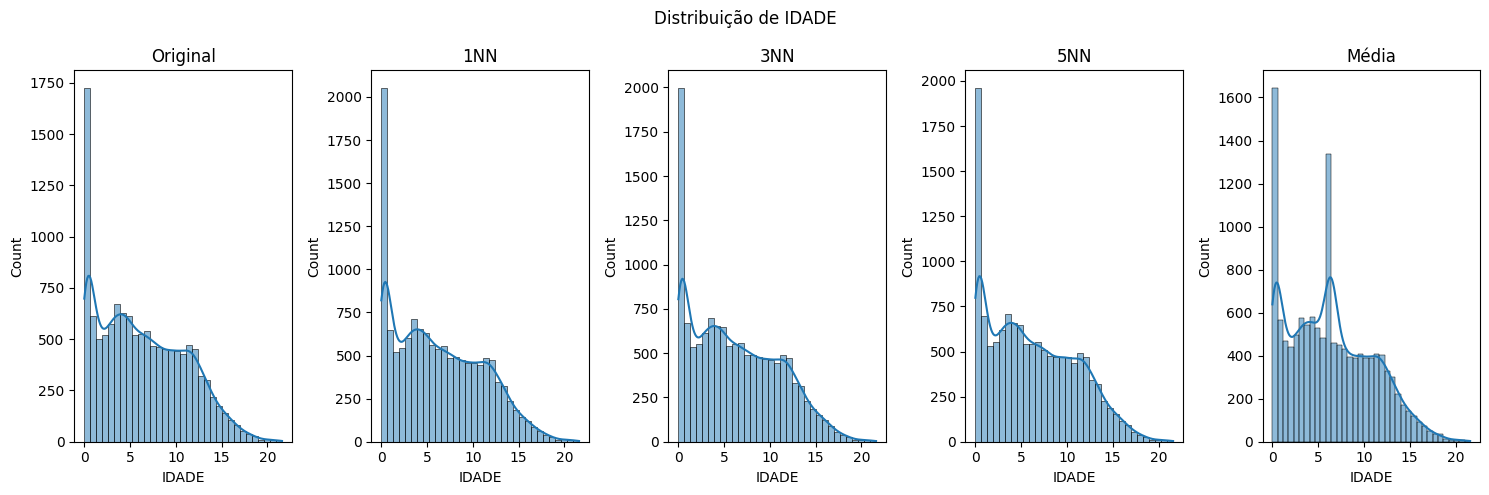

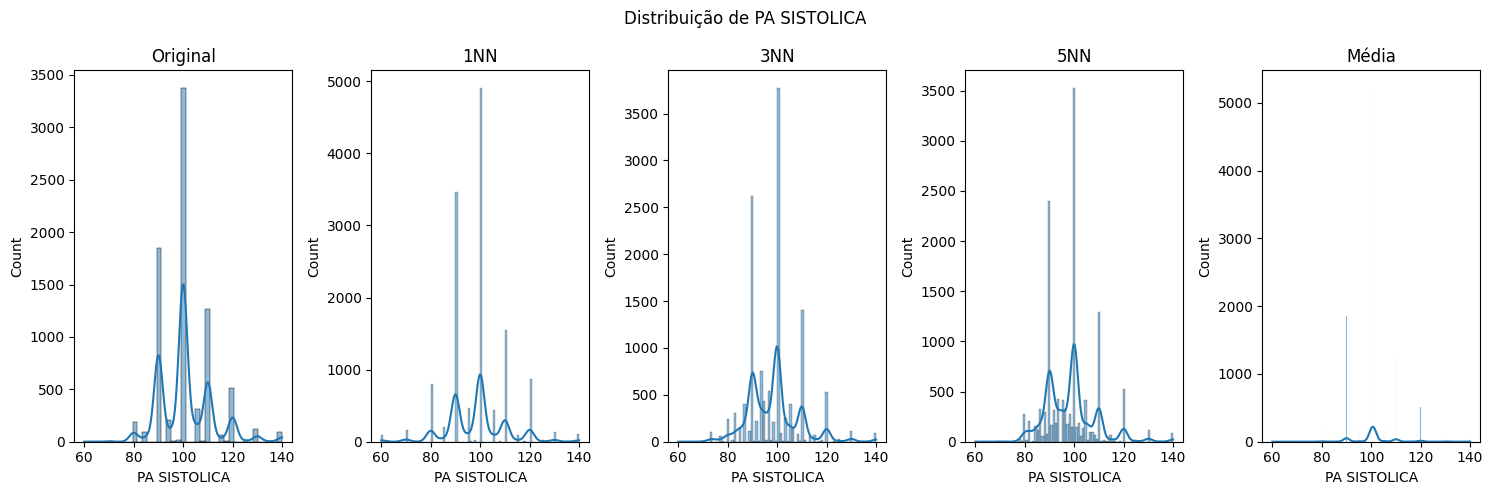

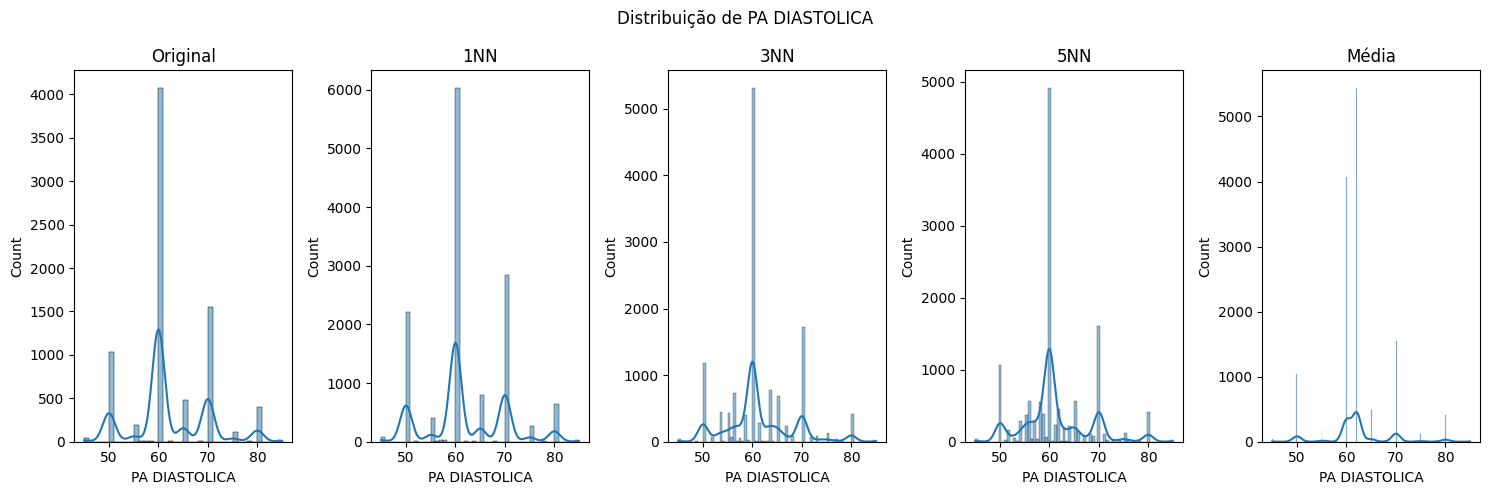

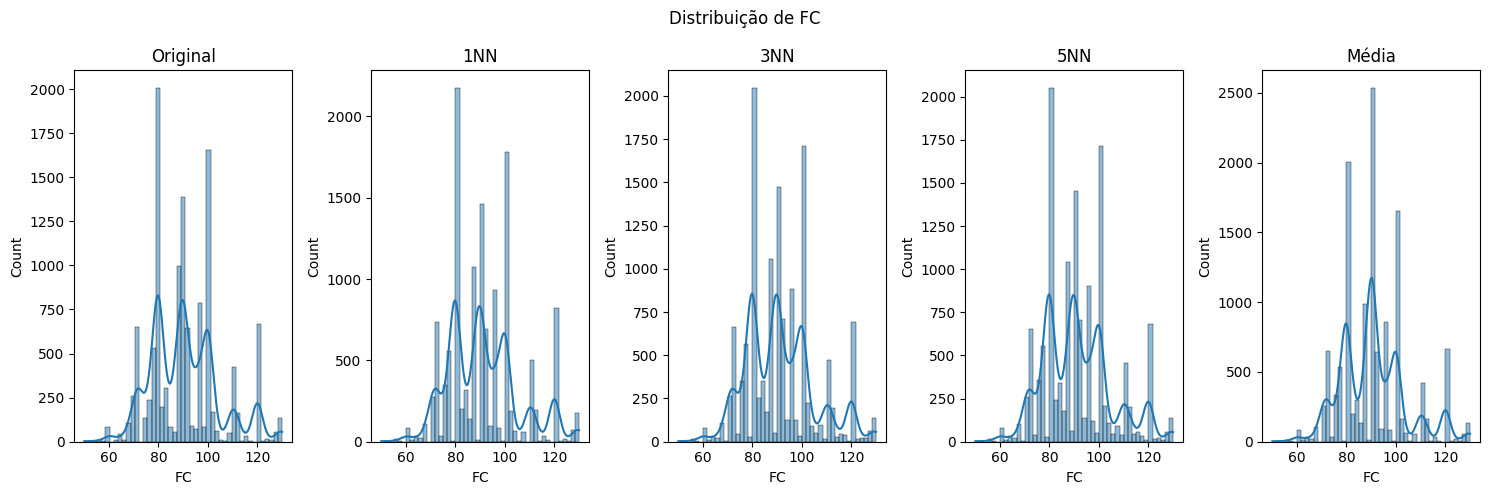

In [36]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

analise_valores_faltantes(df_train[col_numerica])

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.histplot(df_train[coluna], ax=axes[0], kde=True)
    axes[0].set_title(f"Original")

    sns.histplot(df_imputed_knn_1[coluna], ax=axes[1], kde=True)
    axes[1].set_title(f"1NN")
    
    sns.histplot(df_imputed_knn_3[coluna], ax=axes[2], kde=True)
    axes[2].set_title(f"3NN")
    
    sns.histplot(df_imputed_knn_5[coluna], ax=axes[3], kde=True)
    axes[3].set_title(f"5NN")
    
    sns.histplot(df_imputed_media[coluna], ax=axes[4], kde=True)
    axes[4].set_title(f"Média")

    plt.tight_layout()    
    plt.show()

Relação de atributos e porcentagem de nulos: 


,qtd,%
PULSOS,31.0,0.231395
PPA,7733.0,57.721878
B2,16.0,0.119430
SOPRO,7.0,0.052251
HDA 1,3323.0,24.804061
SEXO,443.0,3.306710
MOTIVO1,140.0,1.045010
MOTIVO2,3092.0,23.079794


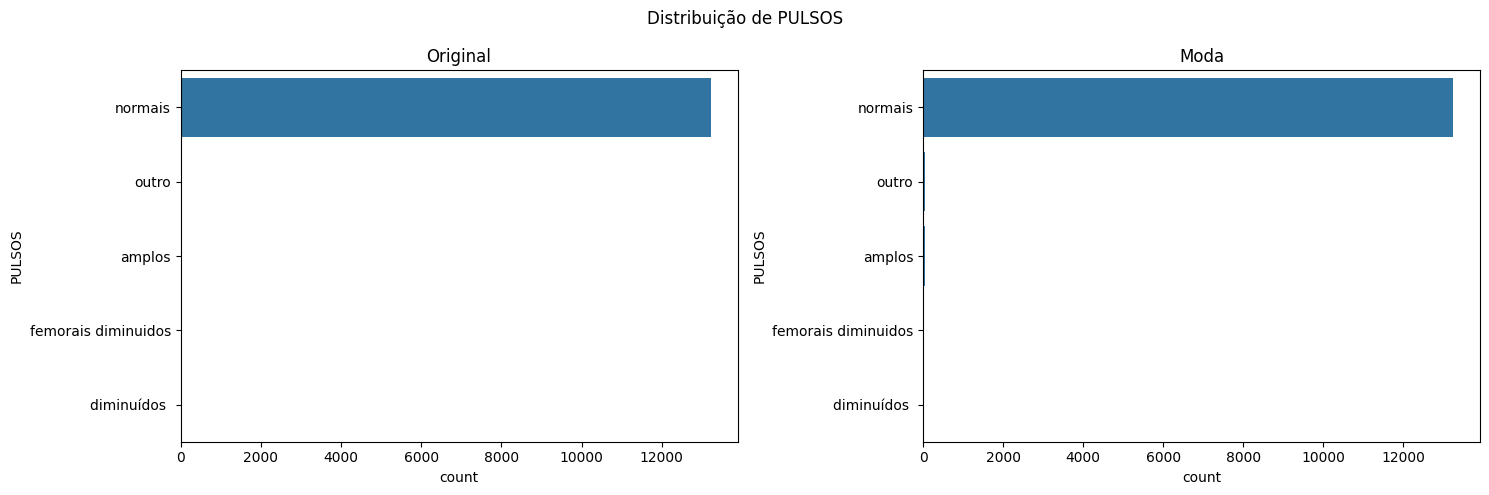

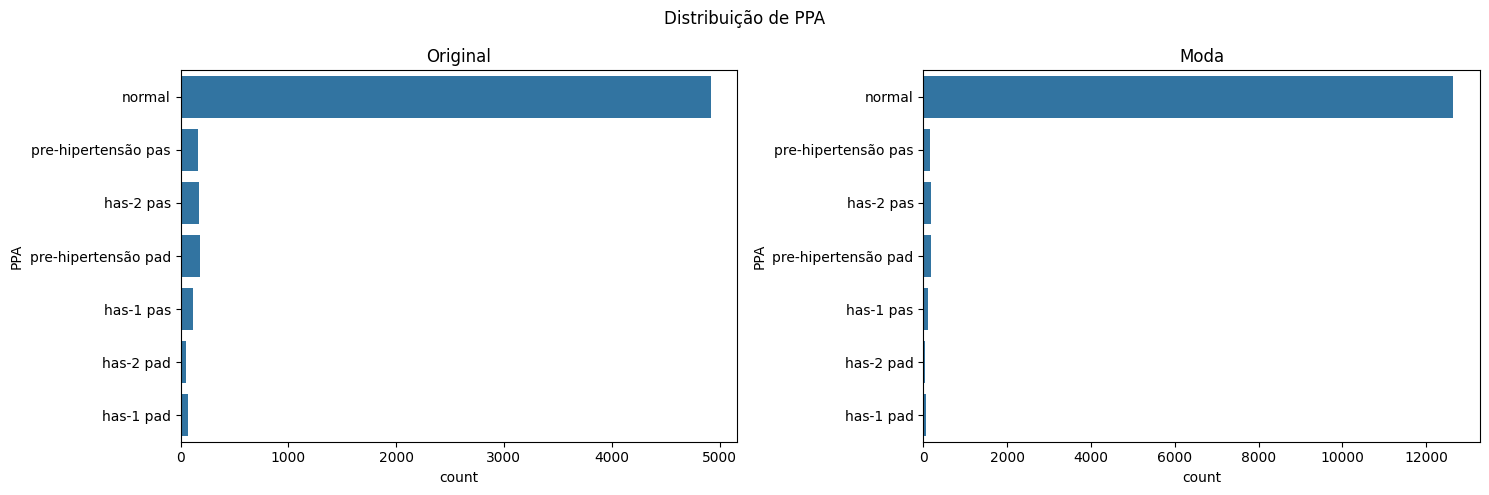

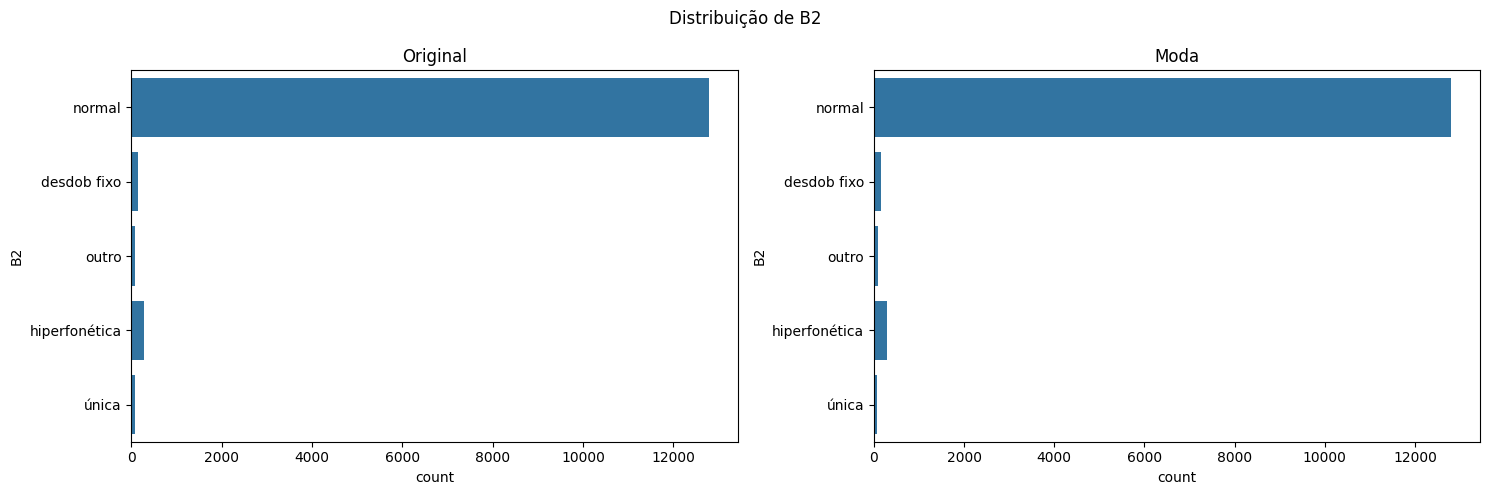

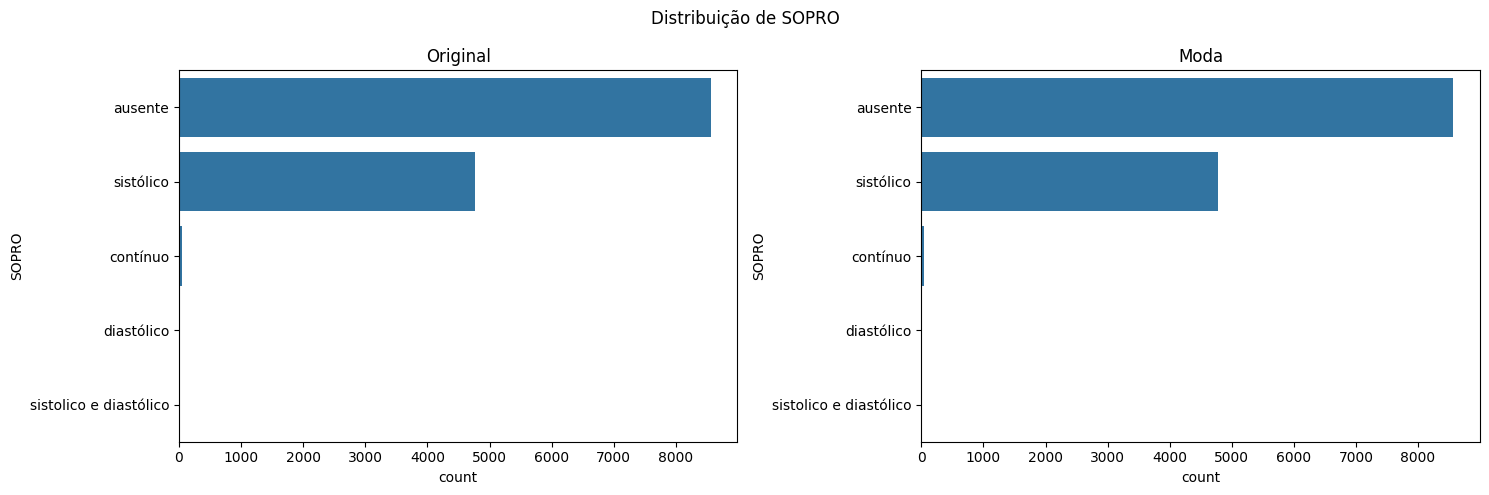

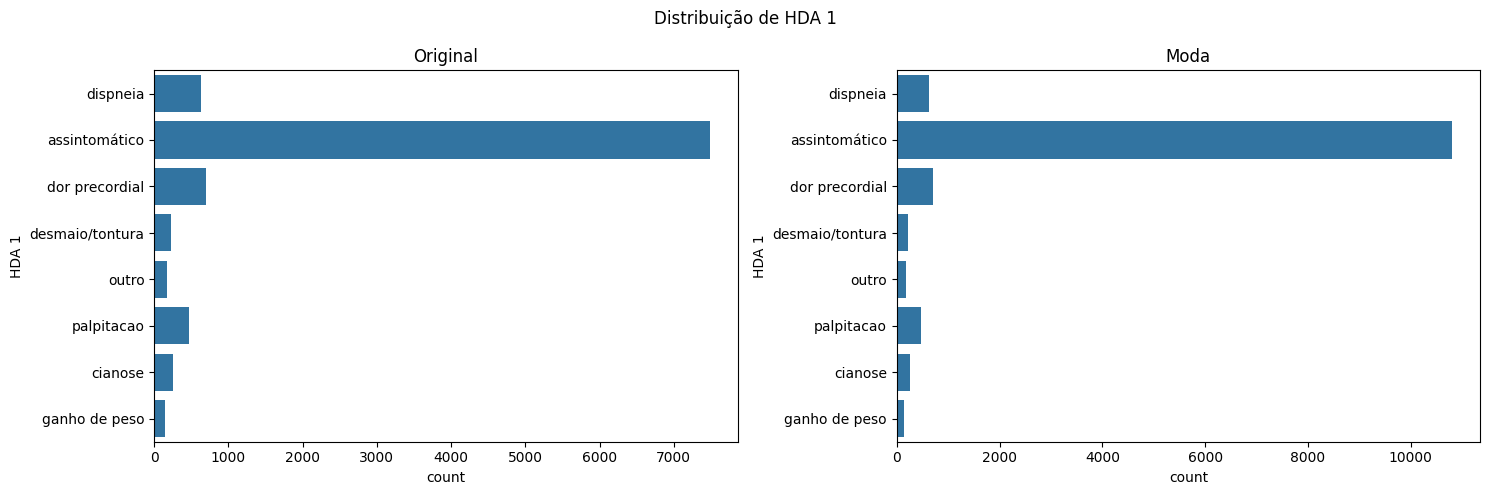

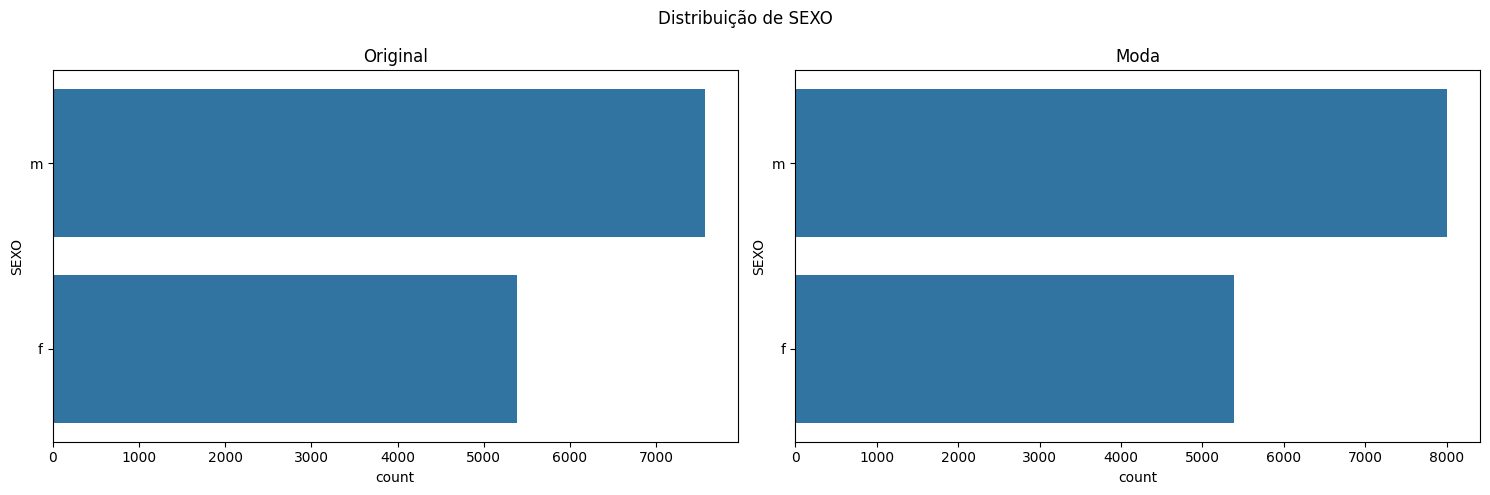

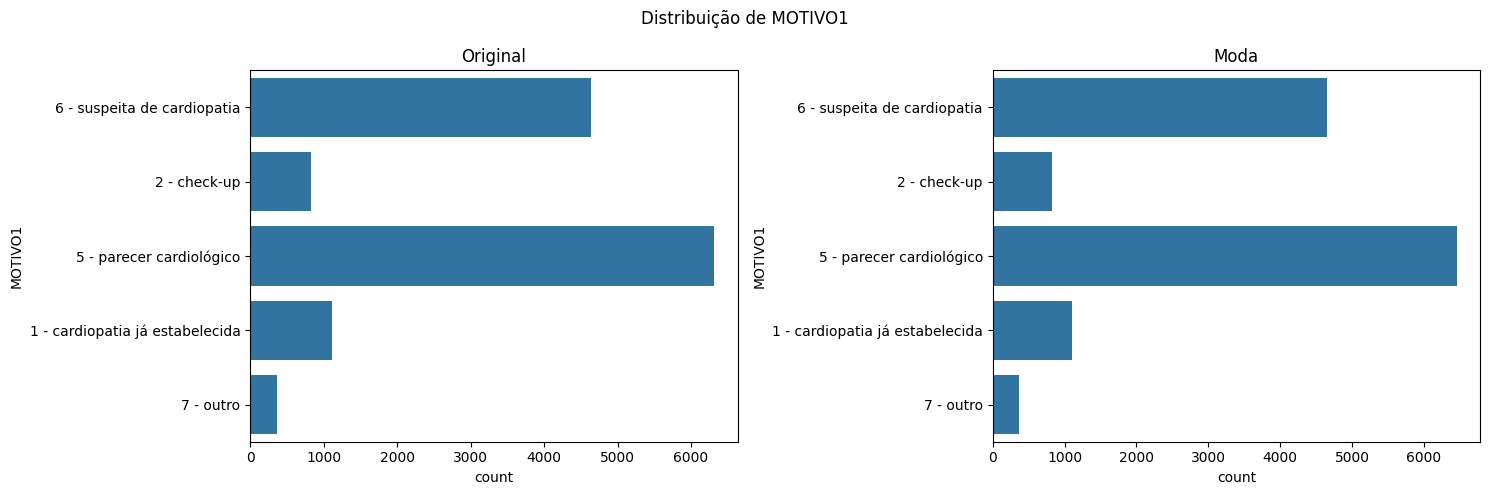

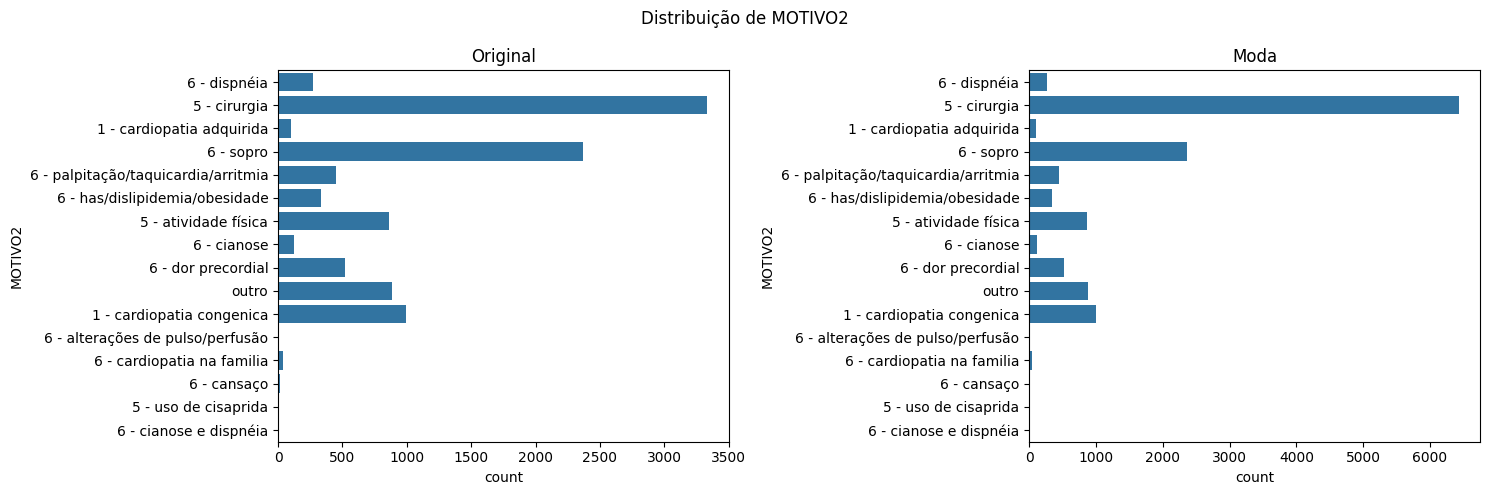

In [37]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

analise_valores_faltantes(df_train[col_categorica])

for coluna in col_categorica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.countplot(df_train[coluna], ax=axes[0])
    axes[0].set_title(f"Original")

    sns.countplot(df_imputed_moda[coluna], ax=axes[1])
    axes[1].set_title(f"Moda")

    plt.tight_layout()    
    plt.show()

In [38]:
display(df_imputed_knn_3)
display(df_imputed_moda)

display(df_train)

# CORRIGIR!!!
# a atribuição não está funcionando, porque os índices estão bagunçados 
df_train[col_numerica] = df_imputed_knn_3[col_numerica]
df_train[col_categorica] = df_imputed_moda[col_categorica]

analise_valores_faltantes(df_train)

,IMC,Peso,Altura,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
0,14.0,3.5,50.0,0.020000,93.333333,63.333333,128.000000
1,16.0,0.0,0.0,8.723333,100.000000,60.000000,88.000000
2,19.0,8.1,65.0,0.500000,101.666667,66.666667,92.000000
3,21.0,26.0,112.0,4.400000,100.000000,60.000000,100.000000
4,18.0,40.0,151.0,12.890000,96.666667,60.000000,96.000000
...,...,...,...,...,...,...,...
13392,15.0,10.6,85.0,2.140000,90.000000,50.000000,100.000000
13393,16.0,9.5,76.0,1.200000,90.000000,55.000000,92.000000
13394,21.0,65.0,175.0,18.413333,126.000000,80.000000,76.000000
13395,15.0,27.0,134.0,10.166667,90.000000,50.000000,90.666667


,PULSOS,PPA,B2,SOPRO,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,normais,normal,normal,ausente,dispneia,m,6 - suspeita de cardiopatia,6 - dispnéia
1,normais,normal,normal,sistólico,assintomático,m,2 - check-up,5 - cirurgia
2,normais,normal,normal,ausente,assintomático,m,5 - parecer cardiológico,5 - cirurgia
3,normais,normal,desdob fixo,ausente,assintomático,m,2 - check-up,5 - cirurgia
4,normais,normal,normal,ausente,dor precordial,m,5 - parecer cardiológico,5 - cirurgia
...,...,...,...,...,...,...,...,...
13392,normais,normal,normal,ausente,assintomático,m,5 - parecer cardiológico,5 - cirurgia
13393,normais,normal,normal,ausente,assintomático,m,5 - parecer cardiológico,5 - cirurgia
13394,normais,normal,normal,ausente,dor precordial,f,1 - cardiopatia já estabelecida,1 - cardiopatia congenica
13395,normais,normal,normal,sistólico,assintomático,f,6 - suspeita de cardiopatia,6 - dor precordial


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,2,3.5,50,14.0,2005-05-25,2005-05-19,0.02,GS,normais,NaN,...,NaN,normal,ausente,128.0,dispneia,NaN,m,6 - suspeita de cardiopatia,6 - dispnéia,1
1,3,0.0,0,NaN,2001-06-12,2005-05-08,NaN,SULA,normais,NaN,...,NaN,normal,sistólico,88.0,assintomático,NaN,m,2 - check-up,NaN,1
2,4,8.1,65,19.0,2009-10-15,2009-04-21,0.50,NaN,normais,NaN,...,NaN,normal,ausente,92.0,assintomático,NaN,m,5 - parecer cardiológico,NaN,1
3,6,26.0,112,21.0,2003-08-22,1999-05-26,4.40,GS,normais,100.0,...,normal,desdob fixo,ausente,100.0,assintomático,NaN,m,2 - check-up,NaN,1
4,7,40.0,151,18.0,2008-01-14,1995-08-14,12.89,SAME,normais,NaN,...,NaN,normal,ausente,96.0,dor precordial,NaN,m,5 - parecer cardiológico,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,17868,10.6,85,15.0,2006-12-28,2004-12-06,2.14,NaN,normais,90.0,...,NaN,normal,ausente,100.0,assintomático,NaN,m,5 - parecer cardiológico,5 - cirurgia,0
14723,17869,9.5,76,16.0,2006-02-03,2004-12-06,1.20,NaN,normais,NaN,...,NaN,normal,ausente,92.0,assintomático,NaN,m,5 - parecer cardiológico,5 - cirurgia,0
14724,17871,65.0,175,21.0,2007-08-03,1984-02-16,NaN,Medial,normais,126.0,...,NaN,normal,ausente,76.0,dor precordial,NaN,f,1 - cardiopatia já estabelecida,1 - cardiopatia congenica,0
14725,17872,27.0,134,15.0,2004-10-04,2027-12-03,NaN,GS,normais,90.0,...,NaN,normal,sistólico,NaN,NaN,NaN,f,6 - suspeita de cardiopatia,6 - dor precordial,0


Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,1210.0,9.031873
Altura,1210.0,9.031873
IMC,1210.0,9.031873
Atendimento,407.0,3.037994
DN,714.0,5.329551
IDADE,1210.0,9.031873
Convenio,3549.0,26.491005
PULSOS,1210.0,9.031873
PA SISTOLICA,1210.0,9.031873


In [39]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (13374, 21)


In [40]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train)
print("Registros de treino sem inconsistências: ", df_train.shape)


Registros de treino sem inconsistências:  (13362, 21)


In [41]:
# GERAR INFORMAÇÃO SOBRE OS ATRIBUTOS CATEGÓRICOS

for coluna in col_categorica:
    display(df_train[coluna].value_counts(dropna=False))

PULSOS
normais                12063
NaN                     1176
amplos                    43
femorais diminuidos       32
outro                     32
diminuídos                16
Name: count, dtype: int64

PPA
normal                 11514
NaN                     1176
pre-hipertensão pad      166
has-2 pas                156
pre-hipertensão pas      141
has-1 pas                104
has-1 pad                 62
has-2 pad                 43
Name: count, dtype: int64

B2
normal           11627
NaN               1176
hiperfonética      264
desdob fixo        146
outro               81
única               68
Name: count, dtype: int64

SOPRO
ausente                   7813
sistólico                 4322
NaN                       1176
contínuo                    41
diastólico                   7
sistolico e diastólico       3
Name: count, dtype: int64

HDA 1
assintomático      9815
NaN                1176
dor precordial      640
dispneia            576
palpitacao          431
cianose             234
desmaio/tontura     211
outro               154
ganho de peso       125
Name: count, dtype: int64

SEXO
m      7313
f      4873
NaN    1176
Name: count, dtype: int64

MOTIVO1
5 - parecer cardiológico           5870
6 - suspeita de cardiopatia        4224
NaN                                1176
1 - cardiopatia já estabelecida    1020
2 - check-up                        748
7 - outro                           324
Name: count, dtype: int64

MOTIVO2
5 - cirurgia                           5844
6 - sopro                              2139
NaN                                    1176
1 - cardiopatia congenica               920
outro                                   796
5 - atividade física                    785
6 - dor precordial                      475
6 - palpitação/taquicardia/arritmia     406
6 - has/dislipidemia/obesidade          299
6 - dispnéia                            254
6 - cianose                             115
1 - cardiopatia adquirida                94
6 - cardiopatia na familia               36
6 - cansaço                              12
5 - uso de cisaprida                      5
6 - alterações de pulso/perfusão          4
6 - cianose e dispnéia                    2
Name: count, dtype: int64

In [42]:
# GERA ESTATÍSTICA DO CONJUNTO PÓS REMOÇÃO DE OUTLIERS

df_detalhes = df_train.describe(include='all')
display(df_detalhes)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13362.000000,12186.000000,12186.000000,12186.000000,12978,12673,12186.000000,9828,12186,12186.000000,...,12186,12186,12186,12186.000000,12186,534,12186,12186,12186,13362.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,5,NaN,...,7,5,5,NaN,8,8,2,5,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GS,normais,NaN,...,normal,normal,ausente,NaN,assintomático,Palpitacao,m,5 - parecer cardiológico,5 - cirurgia,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2119,12063,NaN,...,11514,11627,7813,NaN,9815,126,7313,5870,5844,NaN
mean,8925.169136,22.371101,88.423929,16.889272,2007-03-04 23:06:04.493758720,2001-02-10 09:42:27.242168320,6.282622,NaN,NaN,98.386728,...,NaN,NaN,NaN,91.130642,NaN,NaN,NaN,NaN,NaN,0.403757
min,2.000000,-40.000000,0.000000,9.000000,1990-01-03 00:00:00,1969-07-14 00:00:00,0.010000,NaN,NaN,60.000000,...,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4440.500000,9.000000,51.000000,14.666667,2005-05-23 00:00:00,1997-06-08 00:00:00,2.170000,NaN,NaN,90.000000,...,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8905.500000,19.000000,102.000000,16.000000,2007-06-20 00:00:00,2001-06-11 00:00:00,5.650000,NaN,NaN,100.000000,...,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13394.750000,32.000000,132.000000,19.000000,2009-01-16 00:00:00,2005-02-10 00:00:00,9.990000,NaN,NaN,101.666667,...,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,1.000000
max,17873.000000,127.000000,198.000000,25.000000,2066-08-22 00:00:00,2068-07-06 00:00:00,21.590000,NaN,NaN,140.000000,...,NaN,NaN,NaN,130.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [43]:
# IDENTIFICAR OUTLIERS CONSIDERANDO TODOS OS ATRIBUTOS
# identificação de outliers por registro 
# uma estratégia é a aplicação do PCA para redução de dimensionalidade 

In [44]:
# CONVERTER SIMBÓLICO-NUMÉRICO

cat_ppa = ['normal', 'pre-hipertensão pas', 'pre-hipertensão pad', 'has-1 pas', 'has-1 pad', 'has-2 pas', 'has-2 pad']
cat_sopro = ['ausente', 'sistólico', 'diastólico', 'contínuo', 'sistolico e diastólico']

df_train = converter_ordinais(df_train, ["PPA", "SOPRO"], [cat_ppa, cat_sopro])

# A ordem será alterada, para mantermos a classe no final ela vai ser separada temporariamente
classes = df_train.iloc[:, -1]
df_train = df_train.drop(columns='CLASSE')

df_train = converter_nominais(df_train, ["PULSOS", "B2", "HDA 1", "SEXO", "MOTIVO1", "MOTIVO2"])

# É adicionada novamente a coluna da classe
df_train = pd.concat([df_train, classes], axis=1)


ValueError: Found unknown categories [nan] in column 0 during fit

In [36]:
# NORMALIZAR ATRIBUTOS

df_train = normalizar(df_train, True)
display(df_train)


TypeError: float() argument must be a string or a real number, not 'Timestamp'

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [338]:
# Importar dados de id dos testes
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

# Associar IDs dos testes a base de dados
df_test =  pd.merge(df_dataset, df_test_id, on='Id')

# Retirar colunas defasadas
df_test = df_test.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)


In [339]:

# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS DE TESTES

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_test[col_numerica] = invalidar_nao_numerico(df_test, col_numerica)
    # identificando valores fora do intervalo aceitável
df_test['IDADE'] = df_test['IDADE'].apply(lambda x: x if 0<x else np.nan)

# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_test[col_categorica] = padronizar_string(df_test, col_categorica)
    # identificando valores inválidos e transformando em NaN
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_test['PPA'] = df_test['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_test['SEXO'] = df_test['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)

for coluna in col_categorica:
    display(df_test[coluna].value_counts(dropna=False))


PULSOS
normais                3114
amplos                   12
femorais diminuidos       7
NaN                       6
outro                     6
diminuídos                1
Name: count, dtype: int64

PPA
NaN                    1731
normal                 1224
pre-hipertensão pad      51
has-2 pas                45
pre-hipertensão pas      34
has-1 pas                34
has-1 pad                17
has-2 pad                10
Name: count, dtype: int64

B2
normal           3018
hiperfonética      59
desdob fixo        33
outro              21
única              13
NaN                 2
Name: count, dtype: int64

SOPRO
ausente       2004
sistólico     1127
contínuo         9
diastólico       4
NaN              2
Name: count, dtype: int64

HDA 1
assintomático      1777
NaN                 800
dor precordial      174
dispneia            130
palpitacao          100
cianose              44
desmaio/tontura      43
ganho de peso        41
outro                37
Name: count, dtype: int64

SEXO
m      1795
f      1265
NaN      86
Name: count, dtype: int64

MOTIVO1
5 - parecer cardiológico           1489
6 - suspeita de cardiopatia        1065
1 - cardiopatia já estabelecida     291
2 - check-up                        206
7 - outro                            71
NaN                                  24
Name: count, dtype: int64

MOTIVO2
5 - cirurgia                           783
NaN                                    719
6 - sopro                              567
1 - cardiopatia congenica              244
5 - atividade física                   213
outro                                  169
6 - palpitação/taquicardia/arritmia    126
6 - dor precordial                     110
6 - has/dislipidemia/obesidade          78
6 - dispnéia                            57
6 - cianose                             33
1 - cardiopatia adquirida               30
6 - cardiopatia na familia               8
6 - cansaço                              4
5 - uso de cisaprida                     4
6 - alterações de pulso/perfusão         1
Name: count, dtype: int64

In [340]:

# PREENCHER FALTANTES 

df_test[col_numerica] = preencher_teste(df_test[col_numerica], df_detalhes.loc['mean', col_numerica].values)

df_test[col_categorica] = preencher_teste(df_test[col_categorica], df_detalhes.loc['top', col_categorica].values)


17.268901703767906
6.381051019512232
100.83315322747673
61.5007442454416
90.65268391248193
normais
normal
normal
ausente
assintomático
m
5 - parecer cardiológico
5 - cirurgia


In [341]:
# CONVERTER SIMBÓLICO-NUMÉRICO
display(df_test['PPA'])

df_test = converter_ordinais(df_test, ["PPA", "SOPRO"], [cat_ppa, cat_sopro])

df_test = converter_nominais(df_test, ["PULSOS", "B2", "HDA 1", "SEXO", "MOTIVO1", "MOTIVO2"])


0       normais
1        normal
2       normais
3       normais
4        normal
         ...   
3141    normais
3142    normais
3143    normais
3144    normais
3145    normais
Name: PPA, Length: 3146, dtype: object

ValueError: Found unknown categories ['normais'] in column 0 during fit

In [975]:
# NORMALIZAR ATRIBUTOS
df_test = normalizar(df_test, False)
display(df_test)

In [ ]:
# GUARDAR DATAFRAME EM MATRIZES

X = df_train.iloc[:, :-1].values
Y = df_train.iloc[:, -1].values

df_test_id

,Id
0,8957
1,4246
2,9089
3,10606
4,9863
...,...
3141,14053
3142,9000
3143,14643
3144,15107


In [977]:
# K-VIZINHOS MAIS PRÓXIMOS
# sensível a escala (trabalha com dados normalizados)
from sklearn.neighbors import KNeighborsClassifier as knn

vizinhos = knn(n_neighbors=5)

vizinhos.fit(X, Y)



KNeighborsClassifier()

In [978]:
# NAIVE BAYES
from sklearn.naive_bayes import

SyntaxError: invalid syntax (668894740.py, line 2)

In [118]:
# REGRESSÃO LOGIÍSTICA
# sensível a escala (trabalha com dados normalizados)


In [119]:
# REDES NEURAIS ARTIFICIAIS
# sensível a escala (trabalha com dados normalizados)


In [120]:
# MÁQUINAS DE VETORES DE SUPORTE
# sensível a escala (trabalha com dados normalizados)


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.